# EXERCISES 0-9 JUAN IGNACIO CABALLERO


## LIBRARIES

In [115]:
import numpy as np
import skimage
from skimage.color import rgb2gray
from scipy import stats
import scipy
import pandas as pd
 

import importlib


from pathlib import Path
from PIL import Image

import matplotlib.pyplot as plt
import napari
from napari.utils import nbscreenshot
%gui qt5

## EXERCISES

## 1 Manage an image
In this case in a python env. by means of jupyter-notebooks

In [118]:
# This should adjust automatically the path i for the files 
ref_path = Path().resolve()
ref_path

WindowsPath('D:/OneDrive - Universidad Politécnica de Madrid/Jupyter Notebooks')

In [4]:
# Declaring the paths to the folders of work

# Example of my path
# folder_to_read = Path(r"D:\OneDrive - Universidad Politécnica de Madrid\Z_Otros\Asignaturas\Procesamiento de imagenes\python_folder")

# Your path should be solved with this:
folder_to_read = Path(ref_path /  "python_folder")
print('This is your path to read the image',str(folder_to_read))

In [ ]:
## Name of the files
name1 = 'particles01.jpg'

ruta_data1 = folder_to_read / name1

## Reading the image,
# this is a method to import the image in the python environment 
with Image.open(str(ruta_data1), mode='r') as img:
    img1 = np.array(img)

## Napari is a visualization program that is displayed outside the jupyter
# This opens a viewer object with the image img1
viewer = napari.view_image(img1)

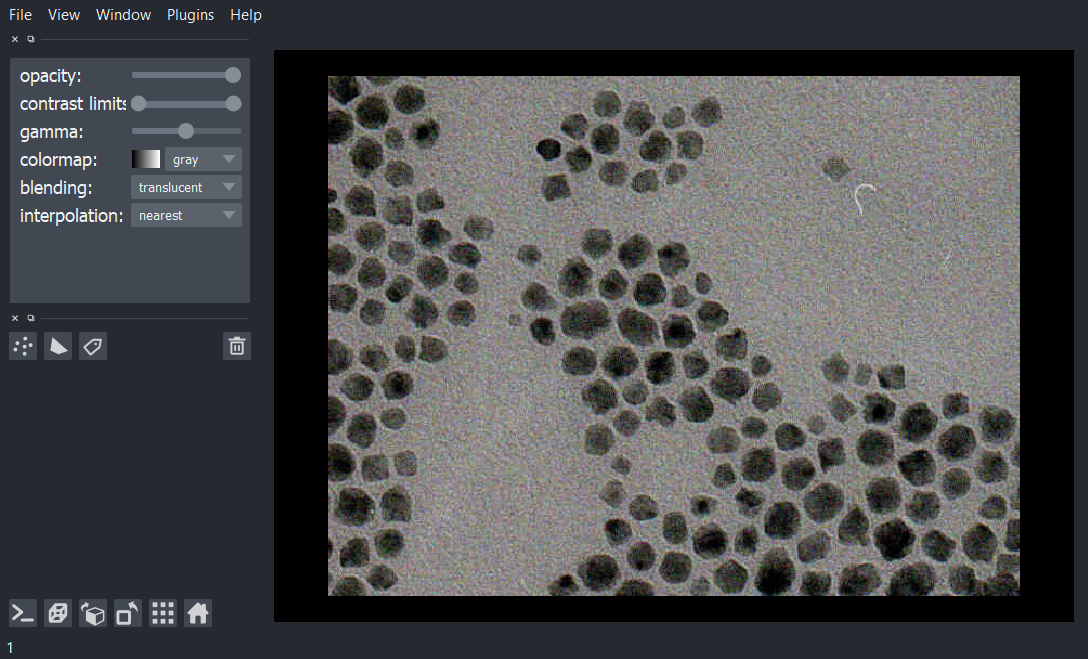

In [4]:
# The viewer has this appearance
nbscreenshot(viewer)

In [6]:
## Once imported the image, it is translated into a numpy array, an object that supports algebraic operations. It is an equivalent to a matrix
# I can access the pixel values by what is called slicing the numpy array

In [13]:
print('first pixel in the matrix:',img1[0,0])
print('first row of pixels in the', img1[0,:])

first pixel in the matrix: [122 103  70]
first row of pixels in the [[122 103  70]
 [120 105  72]
 [117 106  78]
 ...
 [104 121  76]
 [117 134  92]
 [125 138 120]]


---------------------------------------------------------------------

## 2.a Implement a threshold in an input image

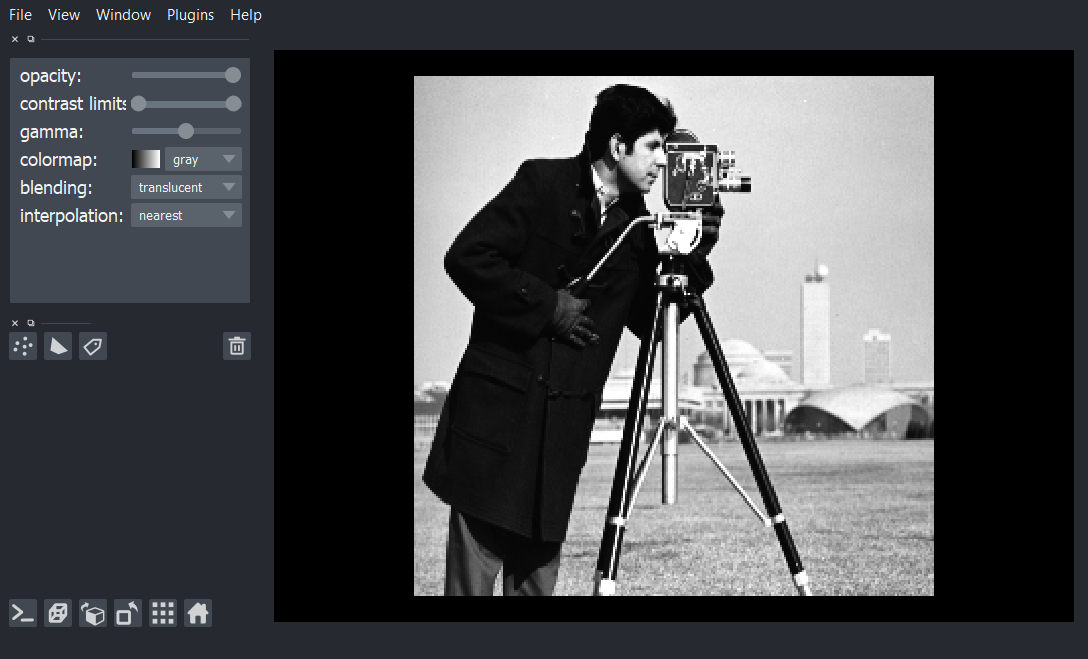

In [5]:
name2 = 'cam_74.pgm'
ruta_data1 = folder_to_read / name2
with Image.open(str(ruta_data1), mode='r') as img:
    img2 = np.array(img)

viewer = napari.view_image(img2)

nbscreenshot(viewer) # not much change but the pixels are only one channel

In [44]:
def umbral(img,value):
    img2 = img.copy()
    img2[img2<value] = 0
    img2[img2>=value] = 255
    
    return img2

In [45]:
img_umbral = umbral(img2,100)
viewer.add_image(img_umbral)
viewer.add_image(img2)

<Image layer 'img2 [1]' at 0x2636b6245c8>

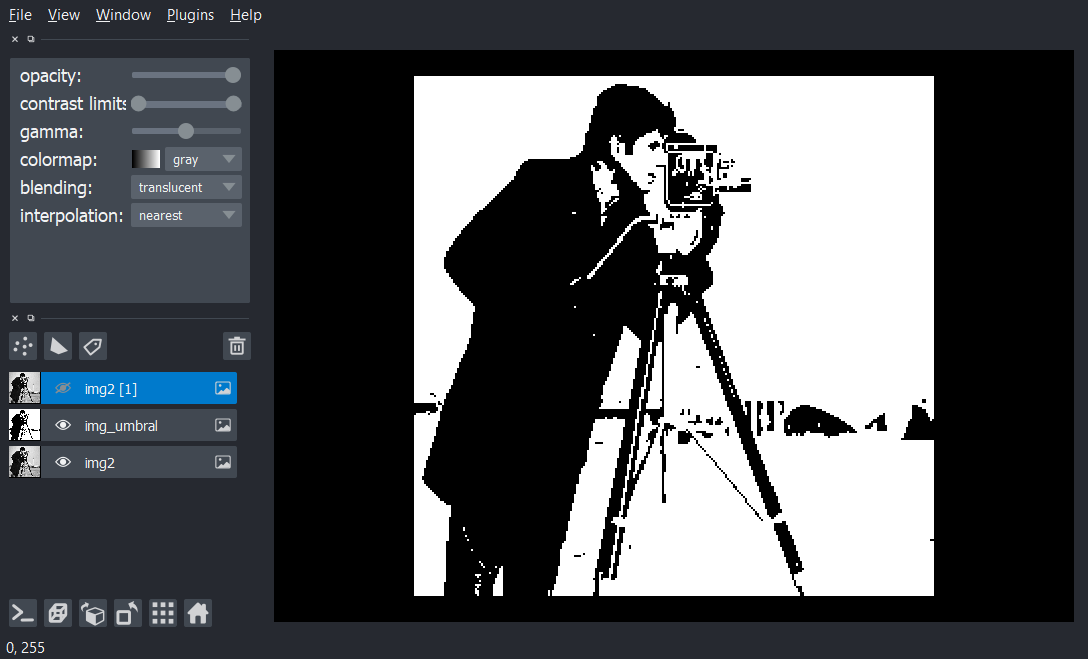

In [46]:
nbscreenshot(viewer)

## 2.b Compare the generated and true threshold image

In [48]:
name3 = 'cam_74_threshold100.pgm'
ruta_data3 = folder_to_read / name3

with Image.open(str(ruta_data3), mode='r') as img:
    img3 = np.array(img)

viewer.add_image(img3)

# img_umbral is the thresholded image while img3 is the one provided as true image.
print('Are my image and the target one equal?', (img_umbral==img3).all())

Are my image and the target one equal? True


## 3.a Implement a morphological erosion of size i using a square of size (2*i+1)x(2*i+1)

In [14]:
'''
Neighbours:
    It computes the neighbours of each pixel. Identifying each of them
    
    vec_array2d: Its the area of the image where the neighbours are computed
    
    vec_array2d has size factor of array2D size: 
    --> size(vec_array) es factor de size(array2d)
    
    The vec_array needs to be flattened to be an input.
    
    output: list of the each type of neighbour and the value of the pixels.
    When in an edge the result is nan
'''    
def neighbours(array2d, vec_array2d):
    vec_array2d_lf = []
    vec_array2d_rg = []
    vec_array2d_up = []
    vec_array2d_dw = []
 
 # Valores a la izda, derecha, arriba y abajo de cada pixel. Estan a una distancia periodica. 
    for i in range(len(vec_array2d)):
        if (i - array2d.shape[1])< 0:
            vec_array2d_lf.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_lf.append(vec_array2d[i - array2d.shape[1]])

    for i in range(len(vec_array2d)):
        if (i + array2d.shape[1])>= vec_array2d.size: # hay que restar 1 por empezar en 0
            vec_array2d_rg.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_rg.append(vec_array2d[i + array2d.shape[1]])

    for i in range(len(vec_array2d)):
        if i % array2d.shape[1] == 0:
            vec_array2d_up.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_up.append(vec_array2d[i - 1])

    for i in range(len(vec_array2d)):
        if i in np.arange(array2d.shape[1]-1, vec_array2d.size+array2d.shape[1], array2d.shape[1]):
            vec_array2d_dw.append(np.nan)  #Borde de imagen tienen nan
        else:
            vec_array2d_dw.append(vec_array2d.flatten('C')[i + 1])

    # Diagonales
    ##Miro los up y down de la columna a izda y derecha.
    diag_iz_up = []
    diag_iz_do = []
    diag_de_up = []
    diag_de_do = []

    for i in range(len(vec_array2d)):
        if ((pd.isnull(vec_array2d_lf[i])) or (pd.isnull(vec_array2d_up[i]))):
            diag_iz_up.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_iz_up.append(vec_array2d[i - array2d.shape[1]-1])
    for i in range(len(vec_array2d)):
        if i in np.arange(array2d.shape[1]-1,vec_array2d.size+array2d.shape[1],array2d.shape[1]) or ((i - array2d.shape[1]+1)<0):
            diag_iz_do.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_iz_do.append(vec_array2d[i - array2d.shape[1]+1])
    for i in range(len(vec_array2d)):
        if ((i + array2d.shape[1])>= vec_array2d.size) or (i % array2d.shape[1] == 0):
            diag_de_up.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_de_up.append(vec_array2d[i + array2d.shape[1]-1])
    for i in range(len(vec_array2d)):
        if ((i + array2d.shape[1])>= vec_array2d.size) or (i in np.arange(array2d.shape[1]-1, vec_array2d.size+array2d.shape[1], array2d.shape[1])): # hay que restar 1 por empezar en 0
            diag_de_do.append(np.nan)  #Borde de imagen tienen nan
        else:
            diag_de_do.append(vec_array2d[i + array2d.shape[1]+1])
    
    return (vec_array2d_lf,vec_array2d_rg,vec_array2d_up,vec_array2d_dw,diag_iz_up,diag_iz_do,diag_de_up,diag_de_do)

In [15]:
ruta_data3 = folder_to_read / 'immed_gray_inv.pgm'

with Image.open(str(ruta_data3), mode='r') as img:
    img3 = np.array(img)

In [17]:
## Checking neighbours
x,y = 0,0
check_img = img3
ii = x*check_img.shape[1]+ y

vec_array2d_up,vec_array2d_dw,vec_array2d_lf,vec_array2d_rg,diag_iz_up,diag_de_up,diag_iz_do,diag_de_do = neighbours(check_img,check_img.flatten('C'))

print('Pixel value at that position',check_img.flatten()[ii],'\nv pixel left',vec_array2d_lf[ii],'\nv pixel right',vec_array2d_rg[ii],'\nv pixel up',vec_array2d_up[ii],'\nv pixel down',vec_array2d_dw[ii],'\ndiagonals',diag_iz_up[ii],diag_iz_do[ii],diag_de_up[ii],diag_de_do[ii])

Pixel value at that position 255 
v pixel left nan 
v pixel right 255 
v pixel up nan 
v pixel down 255 
diagonals nan nan nan 44


In [18]:
# These are the left top corner values
img3[:3,:3]

array([[255, 255, 255],
       [255,  44,  27],
       [255,  51,  27]], dtype=uint8)

In [47]:
def erosion(img, filtro1d):
    '''
    Filtro refers to the 2D array that may be a subarea of the image. it follows the limitation of neighbours func. Usually its the whole image
    '''
    alln = neighbours(img,filtro1d)
    ## Adding image pixels, alln only has the neighbours of each pixel
    alln = list(alln)
    alln.append(img.flatten().tolist())
    # we need an array type to be analysed along axis
    alln = np.array(alln)
    # computing the min value.
    ero_img = np.nanmin(alln,axis=0).reshape(img.shape)
    return ero_img

ero_img3 = erosion(img3,img3.flatten())
viewer3 = napari.view_image(ero_img3)
viewer3.add_image(img3)

<Image layer 'img3' at 0x23475895f48>

## Testing the erosion

In [20]:
ruta_data4 = folder_to_read / 'immed_gray_inv_20051123_ero1.pgm'

with Image.open(str(ruta_data4), mode='r') as img:
    img4 = np.array(img)

print("Is it the well performed the erosion:",(ero_img3==img4).all())

## I used this to check where the code was failing.
# viewer3.add_image(img4==ero_img3)

Is it the well performed the erosion: True


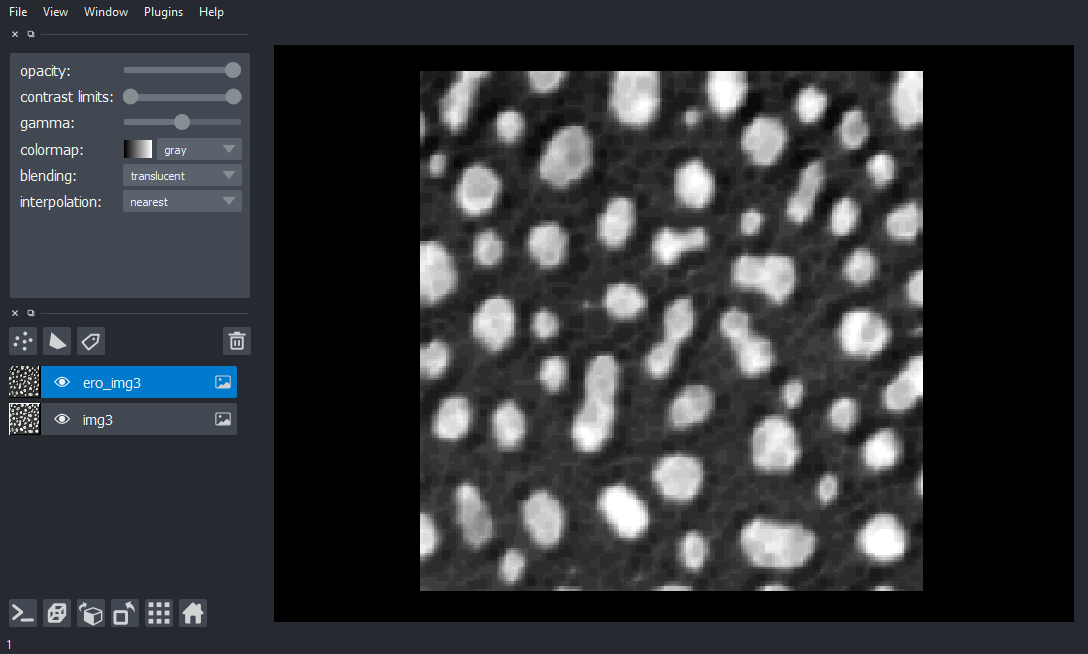

In [21]:
nbscreenshot(viewer3)

## 3.b Implement a morphological dilation of size i using a square of size (2*i+1)x(2*i+1)

In [48]:
def dilation(img, filtro1d):
    '''
    Filtro refers to the 2D array that may be a subarea of the image. it follows the limitation of neighbours func. Usually its the whole image
    '''
    alln = neighbours(img,filtro1d)
    ## Adding image pixels, alln only has the neighbours of each pixel
    alln = list(alln)
    alln.append(img.flatten().tolist())
    # we need an array type to be analysed along axis
    alln = np.array(alln)
    # computing the min value.
    ero_img = np.nanmax(alln,axis=0).reshape(img.shape)
    return ero_img

dil_img3 = dilation(img3,img3.flatten())
viewer3.add_image(dil_img3)

<Image layer 'dil_img3' at 0x2346d24c7c8>

## Testing the dilation

In [23]:
ruta_data5 = folder_to_read / 'immed_gray_inv_20051123_dil1.pgm'

with Image.open(str(ruta_data5), mode='r') as img:
    img5 = np.array(img)

print("Is it the well performed the erosion:",(dil_img3==img5).all())

## I used this to check where the code was failing.
# viewer3.add_image(img4==ero_img3)

Is it the well performed the erosion: True


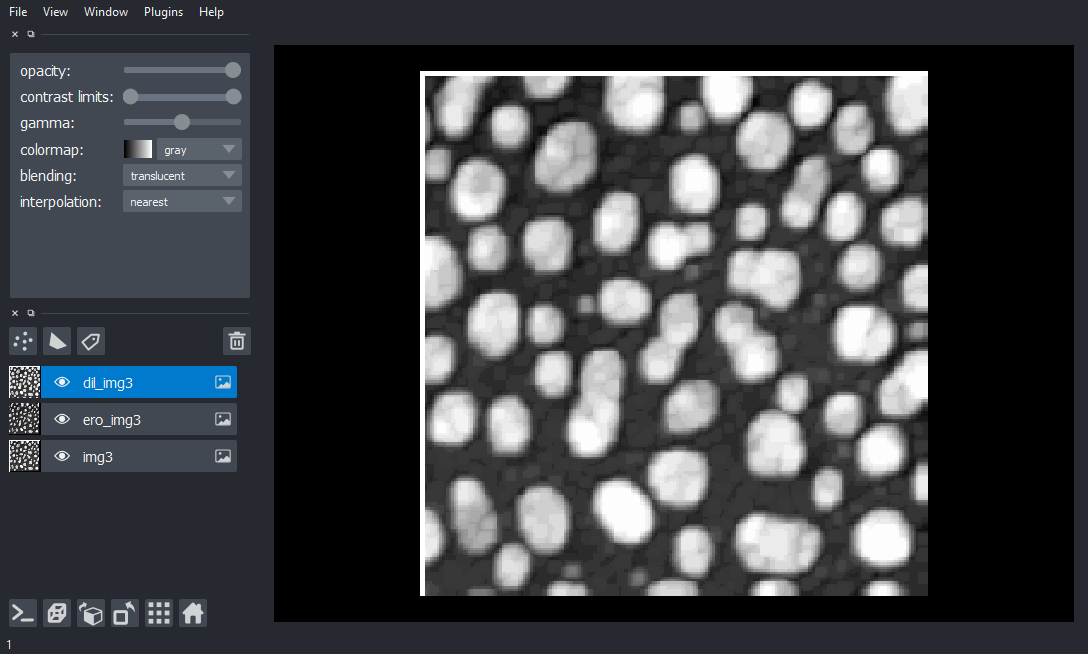

In [24]:
nbscreenshot(viewer3)

## 4.a Implement a morphological opening of size i using a square of size (2*i+1)x(2*i+1)

## 4.b Implement a morphological closing of size i using a square of size (2*i+1)x(2*i+1)

In [55]:
# An opening is an erosion followed by an dilation.
def erosion(img, filtro1d):
    '''
    Filtro refers to the 2D array that may be a subarea of the image. it follows the limitation of neighbours func. Usually its the whole image
    '''
    alln = neighbours(img,filtro1d)
    ## Adding image pixels, alln only has the neighbours of each pixel
    alln = list(alln)
    alln.append(img.flatten().tolist())
    # we need an array type to be analysed along axis
    alln = np.array(alln)
    # computing the min value.
    ero_img = np.nanmin(alln,axis=0).reshape(img.shape)
    return ero_img

def dilation(img, filtro1d):
    '''
    Filtro refers to the 2D array that may be a subarea of the image. it follows the limitation of neighbours func. Usually its the whole image
    '''
    alln = neighbours(img,filtro1d)
    ## Adding image pixels, alln only has the neighbours of each pixel
    alln = list(alln)
    alln.append(img.flatten().tolist())
    # we need an array type to be analysed along axis
    alln = np.array(alln)
    # computing the min value.
    ero_img = np.nanmax(alln,axis=0).reshape(img.shape)
    return ero_img

def opening(img,filtro1d):
    resul = erosion(img,filtro1d)
    resul = dilation(resul,resul.flatten())
    return resul

def closing(img,filtro1d):
    resul = dilation(img,filtro1d)
    resul = erosion(resul,resul.flatten())
    return resul

In [56]:
ope_img3 = opening(img3,img3.flatten())
clo_img3 = closing(img3,img3.flatten())

## Testing 

In [57]:
ruta_data6 = folder_to_read / 'immed_gray_inv_20051123_ope1.pgm'
ruta_data7 = folder_to_read / 'immed_gray_inv_20051123_clo1.pgm'

with Image.open(str(ruta_data6), mode='r') as img:
    img6 = np.array(img)

with Image.open(str(ruta_data7), mode='r') as img:
    img7 = np.array(img)    
print("Is the opening well performed:",(ope_img3==img6).all())
print("Is the closing well performed:",(clo_img3==img7).all())

## I used this to check where the code was failing.
# viewer3.add_image(img4==ero_img3)

Is the opening well performed: True
Is the closing well performed: True


In [58]:
viewer3.add_image(ope_img3)
viewer3.add_image(clo_img3)

<Image layer 'clo_img3' at 0x2346d7cad08>

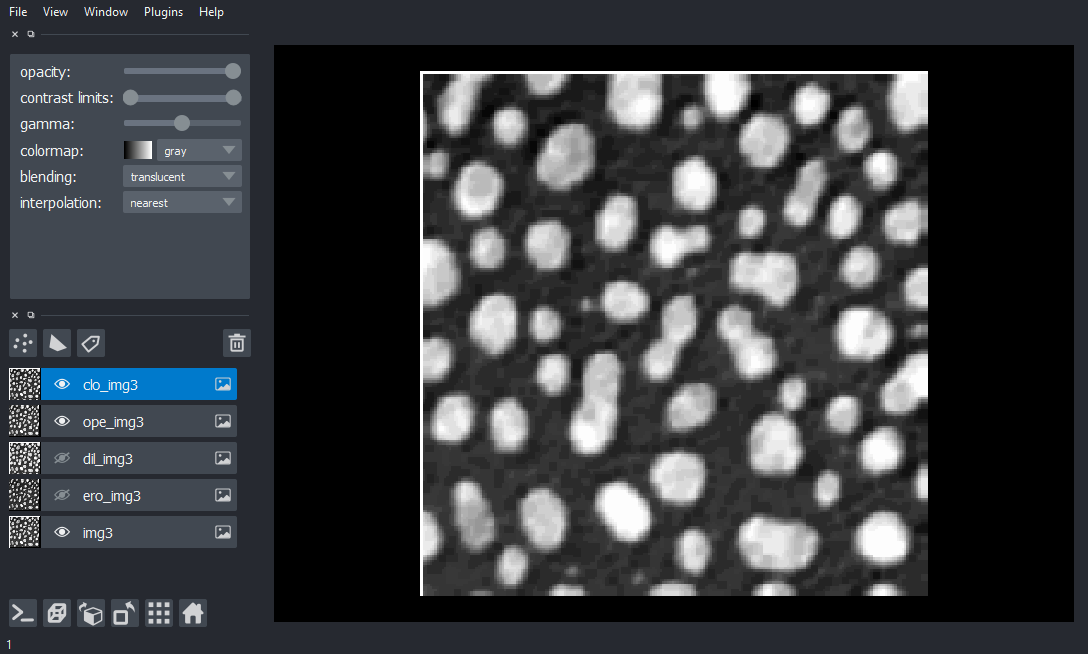

In [31]:
nbscreenshot(viewer3)

## 5.a Check the idempotent of openings

## 5.b Check the idempotent of closing

In [32]:
ope2_img3 = opening(ope_img3,ope_img3.flatten())
clo2_img3 = closing(clo_img3,clo_img3.flatten())

## Testing 

In [34]:
print("Is the opening idempotent:",(ope2_img3==ope_img3).all())
print("Is the closing idempotent:",(clo2_img3==clo_img3).all())

## I used this to check where the code was failing.
# viewer3.add_image(img4==ero_img3)

Is the opening idempotent: True
Is the closing idempotent: True


## 6.a Implement a closing-opening alternate filter

## 6.b Implement a opening-closing alternate filter

In [84]:
def opening(img,i):
    resul = img
    for ii in range(i):
        resul = erosion(resul,resul.flatten())
        
    for ii in  range(i):
        resul = dilation(resul,resul.flatten())
    return resul

def closing(img,i):
    resul = img
    for ii in range(i):
        resul = dilation(resul,resul.flatten())
        
    for ii in  range(i):
        resul = erosion(resul,resul.flatten())
    return resul

def alt_closing_opening(img,iclo,iope):
    resul = closing(img,iclo)
    resul = opening(resul,iope)
    return resul

def alt_opening_closing(img,iclo,iope):
    
    resul = opening(img,iope)
    resul = closing(resul,iclo)
    return resul

In [85]:
clo2_ope_img3 = alt_closing_opening(img3,2,2)
ope2_ope_img3 = alt_opening_closing(img3,2,2)

## Testing 

In [89]:
ruta_data8 = folder_to_read / 'immed_gray_inv_20051123_ope2clo2.pgm'
ruta_data9 = folder_to_read / 'immed_gray_inv_20051123_clo2ope2.pgm'

with Image.open(str(ruta_data8), mode='r') as img:
    img8 = np.array(img)

with Image.open(str(ruta_data9), mode='r') as img:
    img9 = np.array(img)
    
print("Is the closing-opening well performed:",(clo2_ope_img3==img8).all())
print("Is the opening-closing well performed:",(ope2_ope_img3==img9).all())

## NOTE
'''
There is a different in notation, I define the functions in the order the filters are applied, but the pdf reference is the opposite
'''



Is the closing-opening well performed: True
Is the opening-closing well performed: True


'\nThere is a different in notation, I define the functions in the order the filters are applied, but the pdf reference is the opposite\n'

In [81]:
viewer3.add_image(clo2_ope_img3)

<Image layer 'clo2_ope_img3' at 0x2347a216f08>

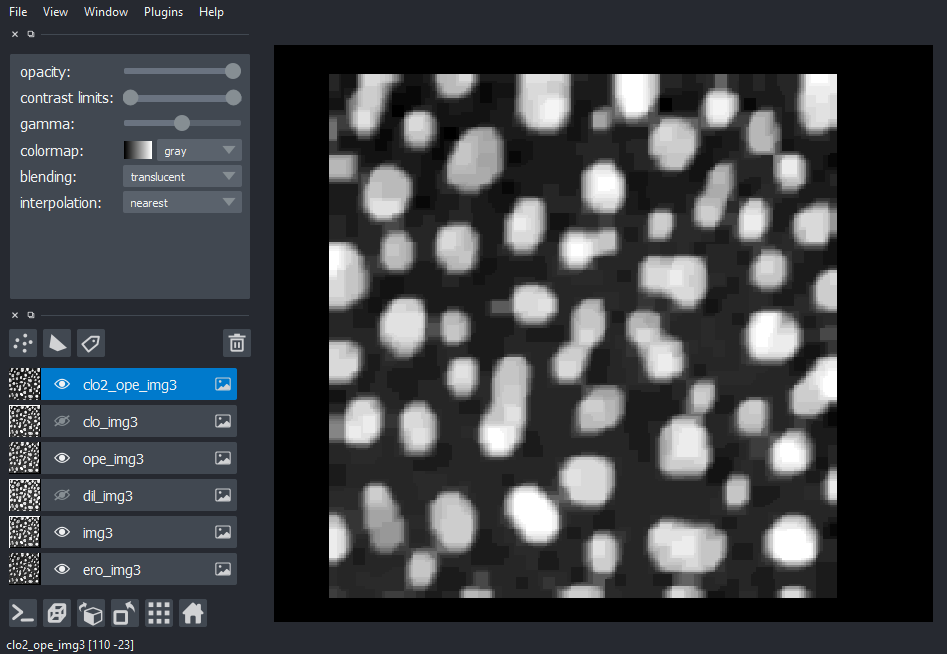

In [91]:
nbscreenshot(viewer3)

## 7.ab Check the idempotent of alternated filters

In [92]:
idem_clo2_ope_img3 = alt_closing_opening(clo2_ope_img3,2,2)
idem_ope2_ope_img3 = alt_opening_closing(ope2_ope_img3,2,2)

## Testing 

In [93]:
print("Is the closing-opening well performed:",(clo2_ope_img3==idem_clo2_ope_img3).all())
print("Is the opening-closing well performed:",(ope2_ope_img3==idem_ope2_ope_img3).all())

Is the closing-opening well performed: True
Is the opening-closing well performed: True


## 8.a Exercise
Let I be the input image in file isn... which has a binary impulsive added ('salt-and-pepper' noise). Let B bea a structuring element square of size 3.

Compute:
* opening_B(I)
* closing_B(I)
* closing_B(opening_B))
* opening_B(closing_B))

Indicate which are the two best filters to eliminate the noise.

In [96]:
## Reading the new image
ruta_data10 = folder_to_read / 'isn_256.pgm'

with Image.open(str(ruta_data10), mode='r') as img:
    img10 = np.array(img)
    
# Visualization
viewer4 = napari.view_image(img10)

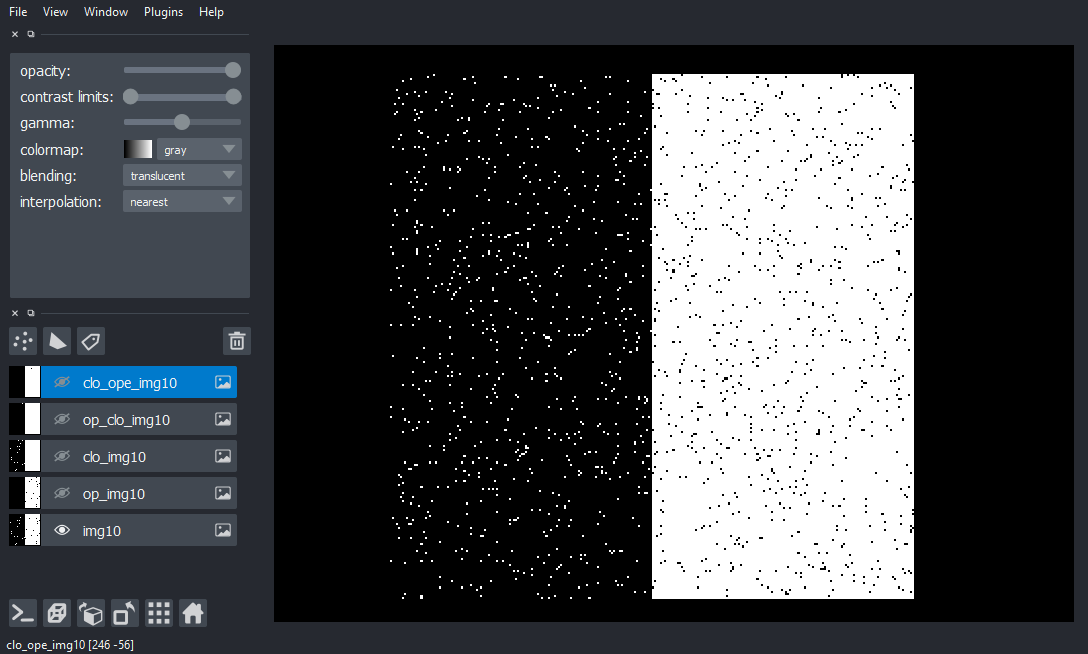

In [107]:
## Original file
nbscreenshot(viewer4)

### Opening_B(I)

In [97]:
op_img10 = opening(img10,1)

In [98]:
viewer4.add_image(op_img10)

<Image layer 'op_img10' at 0x234758c9688>

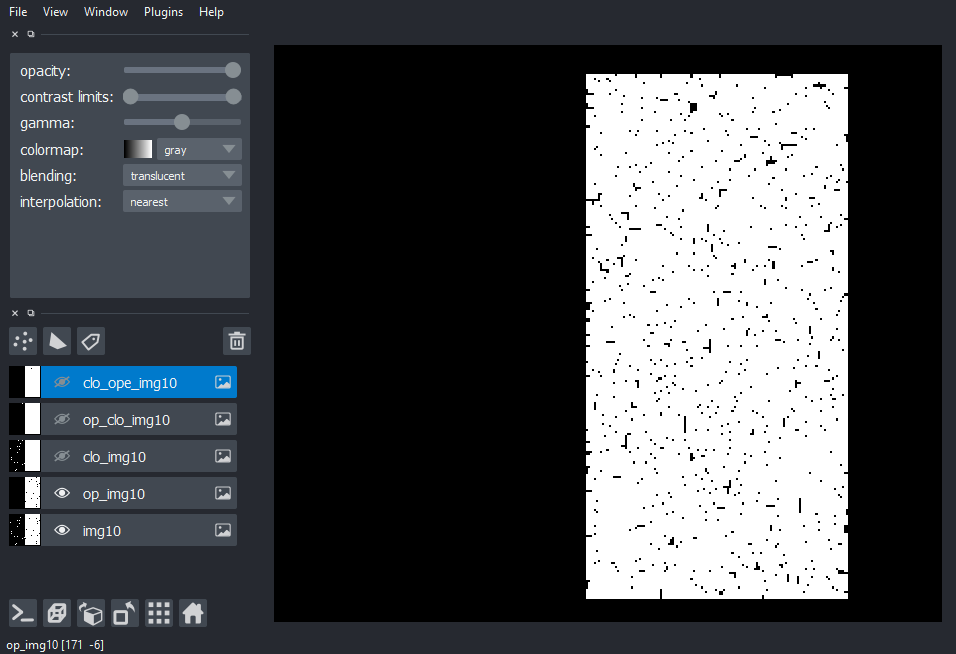

In [108]:
## opening filter
nbscreenshot(viewer4)

### Closing_B(I)

In [100]:
clo_img10 = closing(img10,1)

In [101]:
viewer4.add_image(clo_img10)

<Image layer 'clo_img10' at 0x23474d93688>

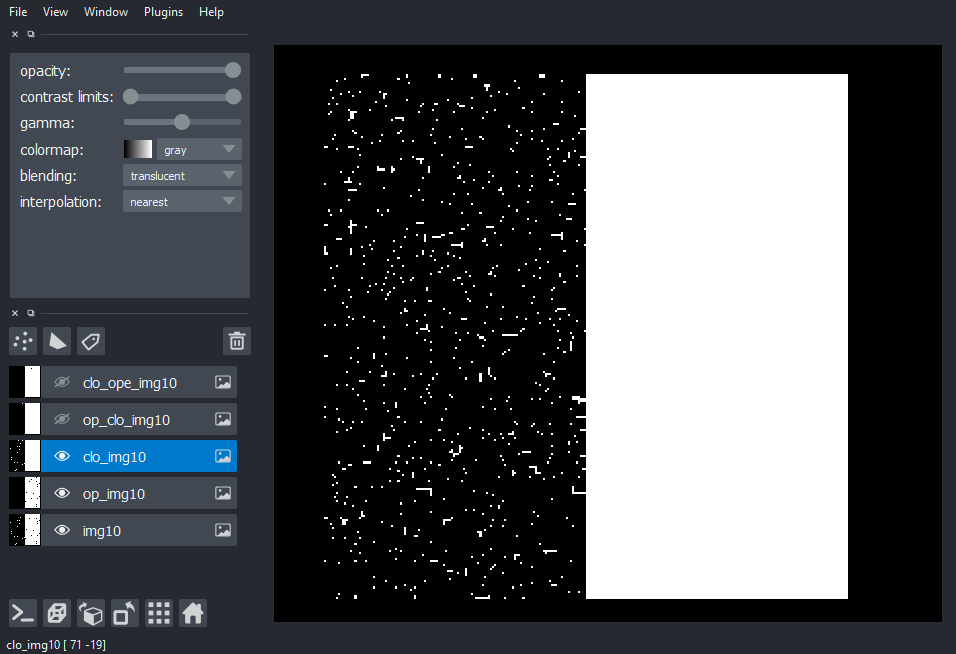

In [109]:
## closing filter
nbscreenshot(viewer4)

### opening_closing(I)

In [103]:
op_clo_img10 = alt_closing_opening(img10,1,1)

In [104]:
viewer4.add_image(op_clo_img10)

<Image layer 'op_clo_img10' at 0x2346cf48a08>

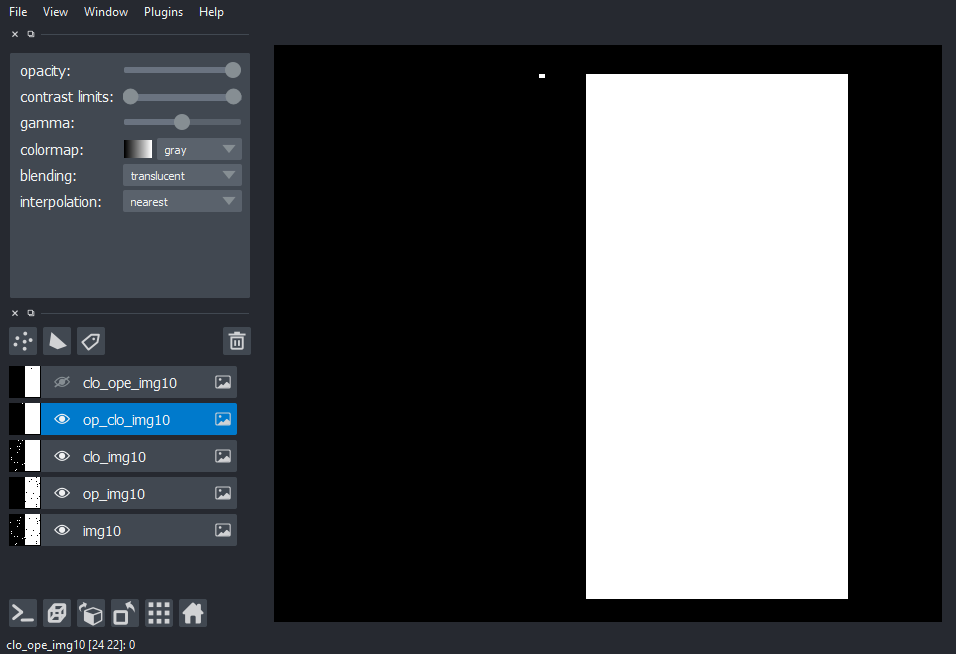

In [110]:
## opening of closing filter
nbscreenshot(viewer4)

### closing_opening(I)

In [105]:
clo_ope_img10 = alt_opening_closing(img10,1,1)

In [106]:
viewer4.add_image(clo_ope_img10)

<Image layer 'clo_ope_img10' at 0x23477bd6788>

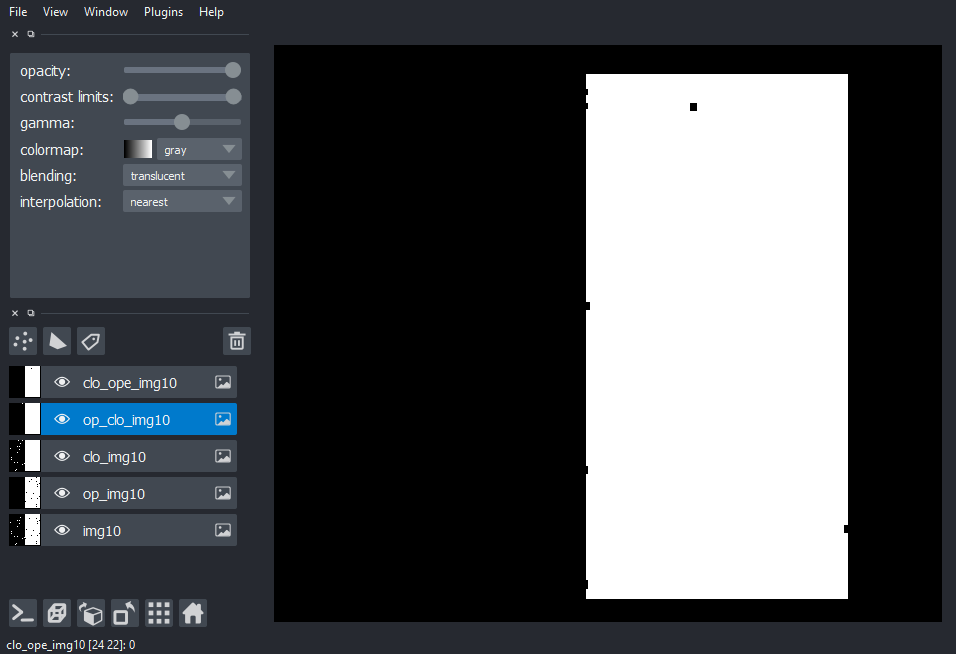

In [111]:
## opening of closing filter
nbscreenshot(viewer4)

### Which are the best filter?
The two alternate filters, closing-opening and viceversa.

## 9.a Proof the idempotence of the 'closing-opening'

In [112]:
## We have already verified in the exercise 7

In [113]:
idemclo_ope_img10 = alt_opening_closing(clo_ope_img10,1,1)

In [114]:
print("Is the closing-opening well performed:",(clo_ope_img10==idemclo_ope_img10).all())


Is the closing-opening well performed: True
